In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('imgs/log.csv')
data.head()

,Generation,BestEval
0,1,0.992344
1,100,1.358421
2,200,1.682064
3,300,2.066749
4,400,2.387955


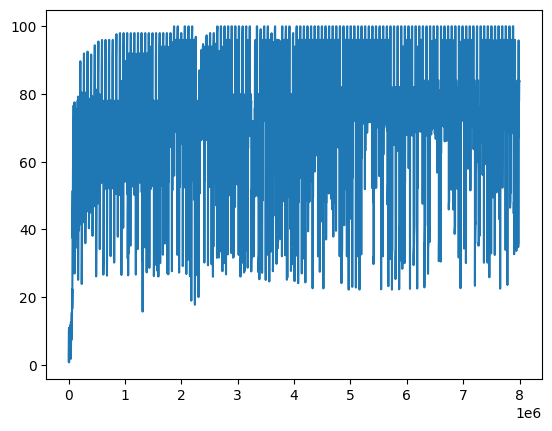

In [3]:
plt.plot(data["Generation"], data["BestEval"])
plt.show()

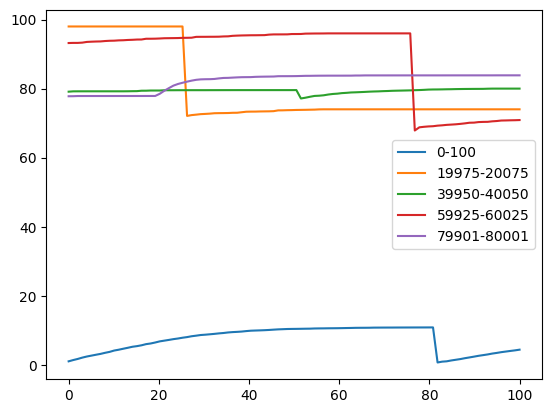

In [4]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.show()